
OBSERVATIONS AND INSIGHTS

1. Capomulin and Ramicane were the only effective drugs in reducing overall tumor size over the    entire course of the study, where the final tumor volume was significantly less compared to the next two most effective drugs (Inf and Cef)
2. There is a significant correlation to mouse size and average tumor volume (pearson r of 0.95) in the Capomulin regimen
3. For mouse s185 on the Capomulin drug regimen (plot shown), tumor size was reduced by almost 50% over the full course of the regimen (0 - 45 days). This trend is also seen in other mice in the same drug regimen (plots not shown).

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

print(len(mouse_metadata))
print(len(study_results))

# Combine the data into a single dataset
data_complete = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID", "Mouse ID"])
data_complete

249
1893


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [3]:
#Check for incomplete data
data_complete.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [4]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#groupby "Drug Regimen", then stats on key "Tumor Volume (mm3)".

drug_grouped_df = data_complete.groupby(["Drug Regimen"])
#drug_grouped_df.head()

ave_tumor_vol = drug_grouped_df["Tumor Volume (mm3)"].mean()
median_tumor_vol = drug_grouped_df["Tumor Volume (mm3)"].median()
var_tumor_vol = drug_grouped_df["Tumor Volume (mm3)"].var()
stdev_tumor_vol = drug_grouped_df["Tumor Volume (mm3)"].std()
sem_tumor_vol = drug_grouped_df["Tumor Volume (mm3)"].sem()

#place stats into a new panda DataFrame
new_drug_df = pd.DataFrame({"Average Tumor Vol (mm3)":ave_tumor_vol, "Median Tumor Vol (mm3)":median_tumor_vol, 
                            "Variance":var_tumor_vol, "Std Dev":stdev_tumor_vol, "SEM":sem_tumor_vol})
new_drug_df

,Average Tumor Vol (mm3),Median Tumor Vol (mm3),Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

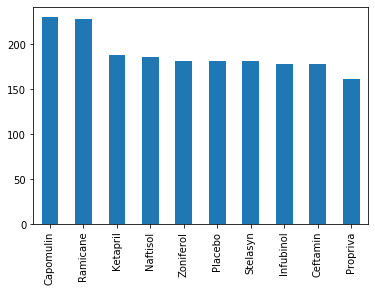

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
bar_panda = data_complete["Drug Regimen"].value_counts().plot.bar()

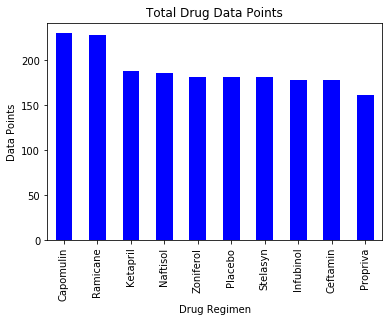

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug = data_complete["Drug Regimen"].value_counts()
drug.plot(kind="bar", facecolor="blue")
plt.title("Total Drug Data Points")
plt.ylabel("Data Points")
plt.xlabel("Drug Regimen")
plt.show()

## Pie plots

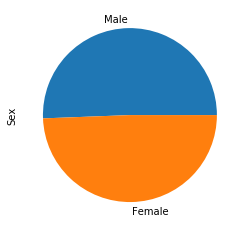

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_panda = data_complete["Sex"].value_counts().plot.pie()

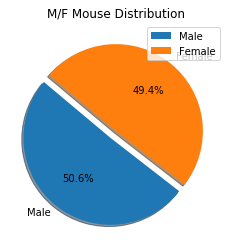

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = data_complete["Sex"].value_counts()
#sex.plot(kind="pie", y=sex)
#explode = (0.1, 0, 0, 0)
labels = ["Male", "Female"]
explode = (0.1,0)
plt.pie(sex, labels=labels, explode = explode,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("M/F Mouse Distribution")
plt.legend(loc="best")
plt.show()

## Quartiles, outliers and boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Capomulin, Ramicane, Infubinol, and Ceftamin
Cap_df = data_complete.loc[data_complete["Drug Regimen"] == "Capomulin"]
Cap_EndTumor = Cap_df.loc[Cap_df["Timepoint"] == 45]

Ram_df = data_complete.loc[data_complete["Drug Regimen"] == "Ramicane"]
Ram_EndTumor = Ram_df.loc[Ram_df["Timepoint"] == 45]

Inf_df = data_complete.loc[data_complete["Drug Regimen"] == "Infubinol"]
Inf_EndTumor = Inf_df.loc[Inf_df["Timepoint"] == 45]

Cef_df = data_complete.loc[data_complete["Drug Regimen"] == "Ceftamin"]
Cef_EndTumor = Cef_df.loc[Cef_df["Timepoint"] == 45]



#Calculate the IQR and quantitatively determine if there are any potential outliers. 
#drug_grouped_df.head(40)
Cap_quartiles = Cap_EndTumor["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Cap_lowerq = Cap_quartiles[0.25]
Cap_upperq = Cap_quartiles[0.75]
Cap_iqr = Cap_upperq-Cap_lowerq
Cap_lower_bound = Cap_lowerq - (1.5*Cap_iqr)
Cap_upper_bound = Cap_upperq + (1.5*Cap_iqr)

Ram_quartiles = Ram_EndTumor["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Ram_lowerq = Ram_quartiles[0.25]
Ram_upperq = Ram_quartiles[0.75]
Ram_iqr = Ram_upperq-Ram_lowerq
Ram_lower_bound = Ram_lowerq - (1.5*Ram_iqr)
Ram_upper_bound = Ram_upperq + (1.5*Ram_iqr)

Inf_quartiles = Inf_EndTumor["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Inf_lowerq = Inf_quartiles[0.25]
Inf_upperq = Inf_quartiles[0.75]
Inf_iqr = Inf_upperq-Inf_lowerq
Inf_lower_bound = Inf_lowerq - (1.5*Inf_iqr)
Inf_upper_bound = Inf_upperq + (1.5*Inf_iqr)

Cef_quartiles = Cef_EndTumor["Tumor Volume (mm3)"].quantile([.25,.5,.75])
Cef_lowerq = Cef_quartiles[0.25]
Cef_upperq = Cef_quartiles[0.75]
Cef_iqr = Cap_upperq-Cap_lowerq
Cef_lower_bound = Cef_lowerq - (1.5*Cef_iqr)
Cef_upper_bound = Cef_upperq + (1.5*Cef_iqr)

print(f"The IQR for Capomulin is: {Cap_iqr}")
print(f"Values below {Cap_lower_bound} could be outliers.")
print(f"Values above {Cap_upper_bound} could be outliers.")
print(f"The IQR for Ramicane is: {Ram_iqr}")
print(f"Values below {Ram_lower_bound} could be outliers.")
print(f"Values above {Ram_upper_bound} could be outliers.")
print(f"The IQR for Infubinol is: {Inf_iqr}")
print(f"Values below {Inf_lower_bound} could be outliers.")
print(f"Values above {Inf_upper_bound} could be outliers.")
print(f"The IQR for Ceftamin is: {Cef_iqr}")
print(f"Values below {Cef_lower_bound} could be outliers.")
print(f"Values above {Cef_upper_bound} could be outliers.")

The IQR for Capomulin is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The IQR for Ramicane is: 7.527130082499998
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.
The IQR for Infubinol is: 4.9311172099999965
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.
The IQR for Ceftamin is: 7.781863460000004
Values below 49.761097039999996 could be outliers.
Values above 79.20027756 could be outliers.


In [10]:
Mouse_ID = Cap_df["Mouse ID"].unique()
Mouse_ID

array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

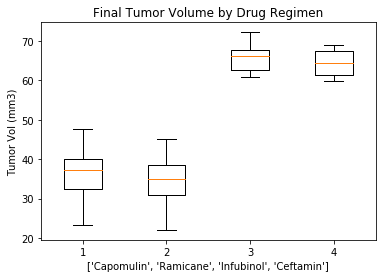

In [11]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Cap_vol = Cap_EndTumor["Tumor Volume (mm3)"]
Ram_vol = Ram_EndTumor["Tumor Volume (mm3)"]
Inf_vol = Inf_EndTumor["Tumor Volume (mm3)"]
Cef_vol = Cef_EndTumor["Tumor Volume (mm3)"]
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Drug Regimen')
ax1.set_ylabel('Tumor Vol (mm3)')
ax1.set_xlabel(drugs)
#ax1.xticks(drugs)
ax1.boxplot([Cap_vol, Ram_vol, Inf_vol, Cef_vol])

plt.show()

## Line and scatter plots

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Set index on Capomulin, use above Cap_df
# Find one mouse id under Capomulin (s185)
#Cap_df.head()

One_mouse = Cap_df.loc[Cap_df["Mouse ID"] == "s185"]
#One_mouse = Cap_df.loc[Cap_df["Mouse ID"] == "t565"]
One_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


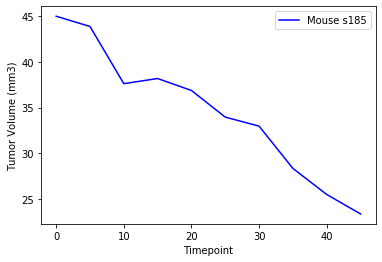

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Timepoint = One_mouse["Timepoint"]
TumorVol = One_mouse["Tumor Volume (mm3)"]

Mouse = plt.plot(Timepoint, TumorVol, color="blue", label="Mouse s185")

#Label x and y axis
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")

plt.show()
# Set x-axis to time point

# Set y-axis to tumor volume

[15, 17, 19, 20, 21, 22, 23, 24, 25]
[15, 17, 19, 20, 21, 22, 23, 24, 25]
Weight (g)
15    36.182040
17    37.214133
19    41.182391
20    39.141053
21    42.088700
22    43.288490
23    43.341051
24    44.805810
25    44.062109
Name: Tumor Volume (mm3), dtype: float64


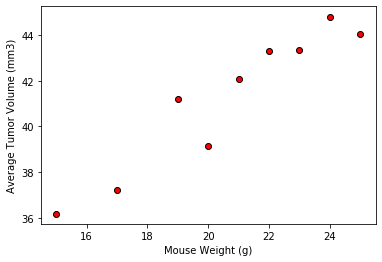

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#Mouse_Weight = Cap_df["Weight (g)"].value_counts()
Mouse_Weight_Group = Cap_df.groupby(["Weight (g)"])
Ave_Tumor_Vol = Mouse_Weight_Group["Tumor Volume (mm3)"].mean()
Ave_Tumor_Vol

#Tumor_Vol
#Mouse_Weight
#x_axis = Cap_df["Weight (g)"].unique()
x_axis = sorted(Cap_df['Weight (g)'].unique())
print(x_axis)

print(sorted(Cap_df['Weight (g)'].unique()))

print(Ave_Tumor_Vol)
plt.scatter(x_axis, Ave_Tumor_Vol, marker="o", facecolors="red", edgecolors="black")
#plt.xlim(0, 75)
#plt.ylim(25, 50)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

In [15]:

# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x_axis,Ave_Tumor_Vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.95


In [21]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, Ave_Tumor_Vol)
#regress_values = x_axis * slope + intercept
print (f'The r squared value is {rvalue}')

NameError: name 'linregress' is not defined